In [9]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
import statistics
from scipy import stats

In [10]:
WRITE_PATH = Path('C:\\', 'Temp', 'Screening_Result')
SAVE_FIGURE = [True, Path('C:\\', 'Temp', 'Screening_Figures')]

In [11]:
# B01 is a control experiments: HelaH201, transient stimulation with 100uM NE and 25uM FSK
data = pd.read_csv(Path(WRITE_PATH,'2021','03','16','chemical','results', 'all_results.csv'))
fit = pd.read_csv(Path(WRITE_PATH,'2021','03','16','chemical','results', 'B01_fit.csv'))
tau = pd.read_csv(Path(WRITE_PATH,'2021','03','16','chemical','results', 'B01_tau.csv'),'\t',header=None)
data = data.replace([np.inf, -np.inf], np.nan)
fit = fit.replace([np.inf, -np.inf], np.nan)
tau = tau.replace([np.inf, -np.inf], np.nan)
frameinterval = 5

Mean start_tau for 100 uM Norepinephrine and 25 uM Forskolin 2.34 ns +/- 0.05 ns (SD), N = 128 datapoints, with SEM of 0.0044 and with the maximum value of 2.52


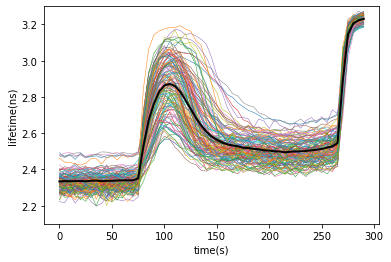

In [12]:
fig = plt.figure()
title = '100 uM Norepinephrine and 25 uM Forskolin'
fit_errorfree = fit[fit['error']==0]
tau_error_free = tau[fit['error']==0]
xax = np.arange(0,frameinterval*len(tau.columns),frameinterval)
minFSKvalue = 3.18
bigger = tau_error_free[tau_error_free.iloc[:,-1] > minFSKvalue]
for i in range(len(bigger)):
    plt.plot(xax,bigger.iloc[i,:],linewidth=0.5)
meantrace = tau_error_free.to_numpy()
meantrace = np.mean(meantrace,axis=0)
plt.plot(xax,meantrace, 'k-',linewidth=2)
plt.xlabel('time(s)')
plt.ylabel('lifetime(ns)')
datapoints=len(tau_error_free)
plt.ylim([2.1,3.3])

control_starttau = (fit_errorfree['start tau(ns)'])
print("Mean start_tau for",title, round(control_starttau.mean(), 2), "ns +/-", round(statistics.stdev(control_starttau), 2), "ns (SD), N =", control_starttau.size, "datapoints,", 'with SEM of', round(stats.sem(control_starttau), 4), 'and with the maximum value of', round(control_starttau.max(), 2))

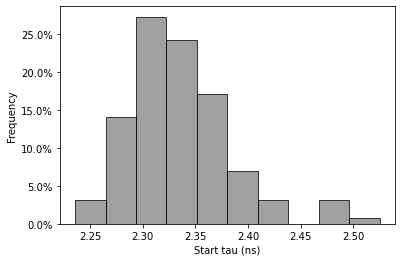

In [13]:
fig = plt.figure()
data = fit_errorfree['start tau(ns)']
plt.hist(data, bins=10, weights=np.ones(len(data))/len(data), facecolor='gray', edgecolor='k', alpha=0.75)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Start tau (ns)')
plt.ylabel('Frequency')
plt.show()